## Logistic Regression Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [3]:
## create the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

In [4]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224
...,...,...,...,...,...,...,...,...,...,...
995,-1.367638,1.462255,-1.154918,-0.290454,-0.413424,0.032396,1.545490,1.428760,1.687092,1.072542
996,-1.514876,-3.221016,-1.300744,0.395599,-0.527994,1.353069,1.777506,-1.680870,1.798510,0.034272
997,1.674633,1.754933,1.586154,0.018402,-1.514470,0.321593,-2.417694,0.692723,-1.503850,0.225264
998,-0.778609,-0.835689,-0.194842,1.097220,0.180071,-0.272933,-0.533188,-0.497354,2.472138,0.867187


In [5]:
pd.DataFrame(y)

,0
0,0
1,1
2,1
3,0
4,1
...,...
995,1
996,1
997,0
998,0


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)
print(y_pred)

[0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1
 1 1 1 0]


In [8]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [9]:
score=accuracy_score(y_pred,y_test)
print(score)



0.8466666666666667


In [10]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       147
           1       0.82      0.89      0.86       153

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [11]:
print(confusion_matrix(y_pred,y_test))

[[118  29]
 [ 17 136]]


## Hyperparameter Tuning And Cross Validation

## Grid SearchCV

In [12]:
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [13]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [41]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [14]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [15]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [16]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [17]:
grid.fit(X_train,y_train)

c:\Users\adwai\anaconda3\envs\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\adwai\anaconda3\envs\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\adwai\anaconda3\envs\venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adwai\anaconda3\envs\venv\Lib\site-packages\sklearn\linear_model\_logi

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [18]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [19]:
grid.best_score_

np.float64(0.8785714285714287)

In [20]:
y_pred=grid.predict(X_test)

In [21]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.8533333333333334
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       157
           1       0.80      0.92      0.86       143

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300

[[124  33]
 [ 11 132]]


## Randomized SearchCV

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
model=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')

In [24]:
randomcv.fit(X_train,y_train)

c:\Users\adwai\anaconda3\envs\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\adwai\anaconda3\envs\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\adwai\anaconda3\envs\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\adwai\anaconda3\envs\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\adwai\anaconda3\envs\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\adwai\anaconda3\envs\venv\Lib\site-packages\sklearn

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [25]:
randomcv.best_score_

np.float64(0.8785714285714287)

In [26]:
randomcv.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}

In [27]:
y_pred=randomcv.predict(X_test)

In [28]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.8533333333333334
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       157
           1       0.80      0.92      0.86       143

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300

[[124  33]
 [ 11 132]]


## Logistic Regression For Multiclass Classification Problem

In [29]:
## create the dataset
X, y = make_classification(n_samples=1000, n_features=10,n_informative=3, n_classes=3, random_state=15)

In [30]:
y

array([2, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2,
       2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0,
       0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2,
       1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2,
       2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0,
       0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2,

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(multi_class='ovr')
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)

c:\Users\adwai\anaconda3\envs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [33]:
y_pred

array([2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1,
       0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1,
       0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2])

In [34]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.79
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        97
           1       0.73      0.81      0.77        91
           2       0.82      0.71      0.76       112

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300

[[84  3 10]
 [10 74  7]
 [ 8 25 79]]


## Logistic Regression for Imbalanced Dataset

In [44]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification


In [45]:
## imbalanced dataset
X,y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,
                   n_redundant=0,weights=[0.99],random_state=10)

In [47]:
pd.DataFrame(X)

,0,1
0,1.879910,-1.485035
1,0.377083,-2.238585
2,1.354312,-2.664638
3,-0.509843,-1.502950
4,0.863561,-1.906364
...,...,...
9995,1.066698,-0.548159
9996,1.058723,-0.933768
9997,0.995099,-0.541924
9998,1.758594,-1.549612


In [48]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [49]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

In [50]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

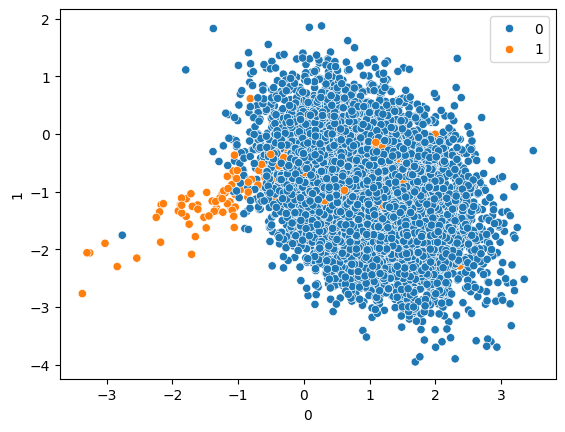

In [51]:
import pandas as pd
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1],hue=y)

In [52]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [53]:
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [54]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [55]:
## Hyperparamter tuning
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [56]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [57]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [59]:
grid.fit(X_train,y_train)

c:\Users\adwai\anaconda3\envs\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\adwai\anaconda3\envs\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\adwai\anaconda3\envs\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\adwai\anaconda3\envs\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\adwai\anaconda3\envs\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\adwai\anaconda3\envs\venv\Lib\site-packages\sklearn

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [60]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [61]:
y_pred=grid.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [63]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.992
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2486
           1       0.40      0.86      0.55        14

    accuracy                           0.99      2500
   macro avg       0.70      0.92      0.77      2500
weighted avg       1.00      0.99      0.99      2500

[[2468   18]
 [   2   12]]


## Logistic Regression With ROC curve And ROC AUC score 

In [64]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [65]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [66]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [67]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.714755,0.911463,0.205002,-1.089584,0.804302,0.965317,-0.613184,0.059381,-1.234188,-0.326076,-0.225410,0.127215,-0.625031,-0.009337,-0.559326,-2.099983,-0.045078,1.763734,0.770983,0.663555
1,-0.915333,-1.464568,0.680776,0.122807,-1.033310,1.004270,-2.315747,1.896016,2.082493,0.615285,0.733672,-0.946281,-0.863081,-0.187095,0.574755,-1.525061,0.098172,1.565577,-2.345131,1.700550
2,0.502318,1.023852,-1.177155,-0.780921,0.085774,-0.586520,0.462640,0.978363,-0.514931,1.495206,-0.287800,-0.158184,-0.459105,1.804939,-0.394773,2.192984,0.788437,-1.736303,0.180602,1.049035
3,-1.358108,-0.365139,0.501966,1.509135,-0.039103,0.171964,-0.301571,1.045878,-0.249979,-1.147112,-0.761301,0.574229,0.454022,0.775152,1.000362,3.560873,-1.132827,0.851323,-0.229696,-1.572272
4,2.255713,-1.185717,-0.268154,-0.190802,2.374848,-1.721132,0.402742,0.035519,0.575395,-1.178877,-2.002348,0.110925,2.273146,0.776780,-1.403965,0.824060,0.960920,-0.366021,-0.444334,0.091102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-0.545813,0.008589,0.935975,0.019876,0.535710,0.861670,-0.663752,0.357532,-1.058647,-0.188015,0.479737,-1.639839,-0.584401,-0.248852,0.336792,-1.545801,0.975339,1.789185,-0.063731,-0.189644
746,2.182462,-0.681800,0.623160,0.139058,-1.277255,-0.032153,-1.939948,-0.671317,-0.554067,-0.596478,0.788017,0.762182,2.622434,-1.740436,-1.322375,-0.164313,-1.062083,-0.457742,0.500383,0.360191
747,-1.847299,-0.116000,0.264185,1.365324,-0.477144,-0.603081,-2.851070,-0.788731,0.791397,-0.241410,0.823123,-0.274744,-0.281038,-0.691212,1.284239,1.120081,-0.688101,1.248752,0.252093,0.782472
748,1.026822,-1.047522,-0.462189,-1.858197,0.052639,0.440871,1.633709,1.216625,0.941937,1.193548,0.923274,0.571366,-1.280807,-0.295205,-0.836107,-0.338236,-0.124012,-0.058088,-1.134001,-0.104267


In [69]:
pd.DataFrame(y_test)

,0
0,1
1,1
2,0
3,1
4,1
...,...
245,0
246,1
247,0
248,1


In [70]:
# Created a dummy model with default 0 as output 
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [71]:
## Lets Create Basic Logistic Model
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [75]:
model.predict(X_test)

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0])

In [78]:
## Prediction based on probability
model_prob=model.predict_proba(X_test)

In [79]:
model_prob

array([[8.17237415e-02, 9.18276259e-01],
       [1.13344259e-01, 8.86655741e-01],
       [9.76832552e-01, 2.31674481e-02],
       [1.81093915e-02, 9.81890609e-01],
       [4.54686794e-02, 9.54531321e-01],
       [2.03249282e-01, 7.96750718e-01],
       [9.93162656e-01, 6.83734407e-03],
       [9.45976087e-01, 5.40239126e-02],
       [8.69028777e-03, 9.91309712e-01],
       [5.91398651e-01, 4.08601349e-01],
       [9.85074068e-01, 1.49259319e-02],
       [8.29281652e-02, 9.17071835e-01],
       [1.37466495e-01, 8.62533505e-01],
       [5.20697767e-03, 9.94793022e-01],
       [9.60063575e-01, 3.99364247e-02],
       [9.50688533e-01, 4.93114672e-02],
       [2.10393564e-02, 9.78960644e-01],
       [8.30240259e-01, 1.69759741e-01],
       [9.62818718e-01, 3.71812822e-02],
       [3.21780632e-02, 9.67821937e-01],
       [9.96085581e-01, 3.91441895e-03],
       [1.14045645e-01, 8.85954355e-01],
       [1.80352806e-01, 8.19647194e-01],
       [4.30414556e-01, 5.69585444e-01],
       [4.115915

In [80]:
## Lets focus on the positive outcome (Probablity of 1)
model_prob=model_prob[:,1]

In [81]:
model_prob

array([9.18276259e-01, 8.86655741e-01, 2.31674481e-02, 9.81890609e-01,
       9.54531321e-01, 7.96750718e-01, 6.83734407e-03, 5.40239126e-02,
       9.91309712e-01, 4.08601349e-01, 1.49259319e-02, 9.17071835e-01,
       8.62533505e-01, 9.94793022e-01, 3.99364247e-02, 4.93114672e-02,
       9.78960644e-01, 1.69759741e-01, 3.71812822e-02, 9.67821937e-01,
       3.91441895e-03, 8.85954355e-01, 8.19647194e-01, 5.69585444e-01,
       5.88408407e-01, 9.73099363e-01, 9.65994342e-01, 2.73877518e-03,
       8.01595231e-01, 1.39002986e-01, 3.52089123e-02, 2.85090339e-01,
       8.10370535e-01, 1.02046853e-01, 9.00968269e-01, 1.04921781e-01,
       6.87638127e-03, 9.69967236e-02, 3.08984187e-02, 7.44365926e-01,
       5.29696559e-02, 1.45061252e-02, 4.47168571e-01, 6.62185322e-01,
       9.42074010e-01, 9.99408591e-01, 9.66013718e-01, 3.60317284e-01,
       1.43606468e-01, 1.42698355e-01, 5.19022312e-01, 6.34300275e-02,
       9.15522435e-01, 8.15943076e-01, 6.17835757e-01, 7.87717087e-02,
      

In [83]:
## Lets calulcate the scores
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.907648


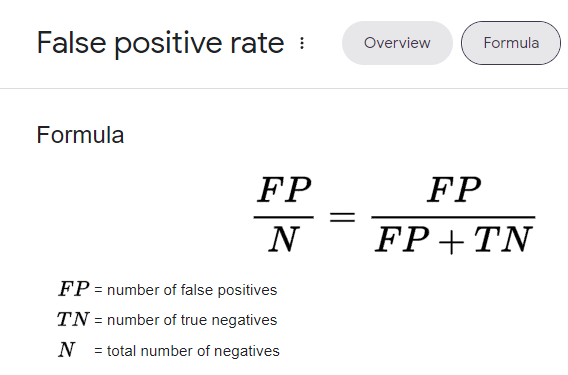
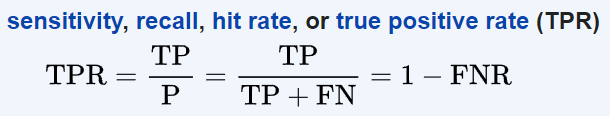

In [93]:
## calculate ROC Curves
dummy_fpr, dummy_tpr, thresh = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [94]:
thresh

array([inf,  0.])

In [87]:
len(model_fpr)

64

In [88]:
thresholds

array([           inf, 9.99408591e-01, 9.48789051e-01, 9.45875797e-01,
       9.35535228e-01, 9.34011458e-01, 9.28076959e-01, 9.26098222e-01,
       9.09462284e-01, 9.01743080e-01, 8.97971882e-01, 8.87913921e-01,
       8.55039135e-01, 8.50088338e-01, 8.45804170e-01, 8.32576905e-01,
       8.19647194e-01, 8.15943076e-01, 8.07941846e-01, 8.01595231e-01,
       7.72502908e-01, 7.72061776e-01, 7.18381195e-01, 7.16495666e-01,
       6.62185322e-01, 6.29275041e-01, 6.17835757e-01, 6.10039921e-01,
       5.96301960e-01, 5.88408407e-01, 5.69585444e-01, 5.42664587e-01,
       5.29164218e-01, 5.13611459e-01, 5.10245990e-01, 4.87974294e-01,
       4.84907445e-01, 4.56156711e-01, 4.47168571e-01, 4.26498394e-01,
       3.64869889e-01, 3.56886293e-01, 3.46033141e-01, 3.08051495e-01,
       3.01298121e-01, 2.85600699e-01, 2.85090339e-01, 2.18727039e-01,
       1.97022170e-01, 1.34038345e-01, 1.33315877e-01, 1.30519699e-01,
       1.27153287e-01, 1.04921781e-01, 1.04292580e-01, 7.04849255e-02,
      

In [89]:
model_fpr,model_tpr

(array([0.   , 0.   , 0.   , 0.008, 0.008, 0.016, 0.016, 0.024, 0.024,
        0.032, 0.032, 0.048, 0.048, 0.056, 0.056, 0.072, 0.072, 0.08 ,
        0.08 , 0.088, 0.088, 0.096, 0.096, 0.104, 0.104, 0.112, 0.112,
        0.128, 0.128, 0.136, 0.136, 0.144, 0.144, 0.16 , 0.16 , 0.184,
        0.184, 0.2  , 0.2  , 0.208, 0.208, 0.224, 0.224, 0.24 , 0.24 ,
        0.256, 0.256, 0.296, 0.296, 0.392, 0.392, 0.4  , 0.4  , 0.448,
        0.448, 0.528, 0.528, 0.56 , 0.56 , 0.624, 0.624, 0.952, 0.952,
        1.   ]),
 array([0.   , 0.008, 0.288, 0.288, 0.368, 0.368, 0.376, 0.376, 0.424,
        0.424, 0.44 , 0.44 , 0.528, 0.528, 0.552, 0.552, 0.608, 0.608,
        0.64 , 0.64 , 0.664, 0.664, 0.704, 0.704, 0.752, 0.752, 0.784,
        0.784, 0.792, 0.792, 0.808, 0.808, 0.824, 0.824, 0.832, 0.832,
        0.84 , 0.84 , 0.848, 0.848, 0.904, 0.904, 0.912, 0.912, 0.92 ,
        0.92 , 0.928, 0.928, 0.944, 0.944, 0.952, 0.952, 0.96 , 0.96 ,
        0.968, 0.968, 0.976, 0.976, 0.984, 0.984, 0.992, 0.9

In [90]:
import seaborn as sns


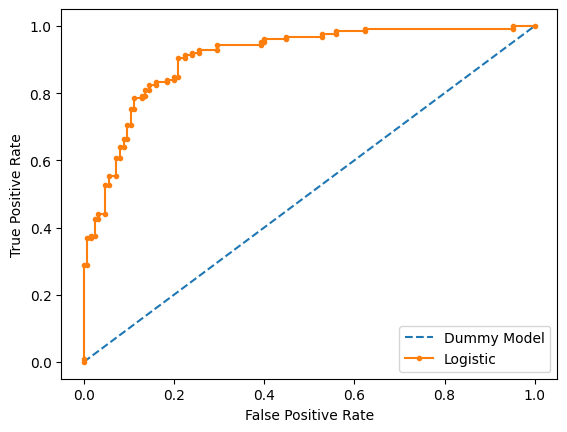

In [91]:
# plot the roc curve for the model
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

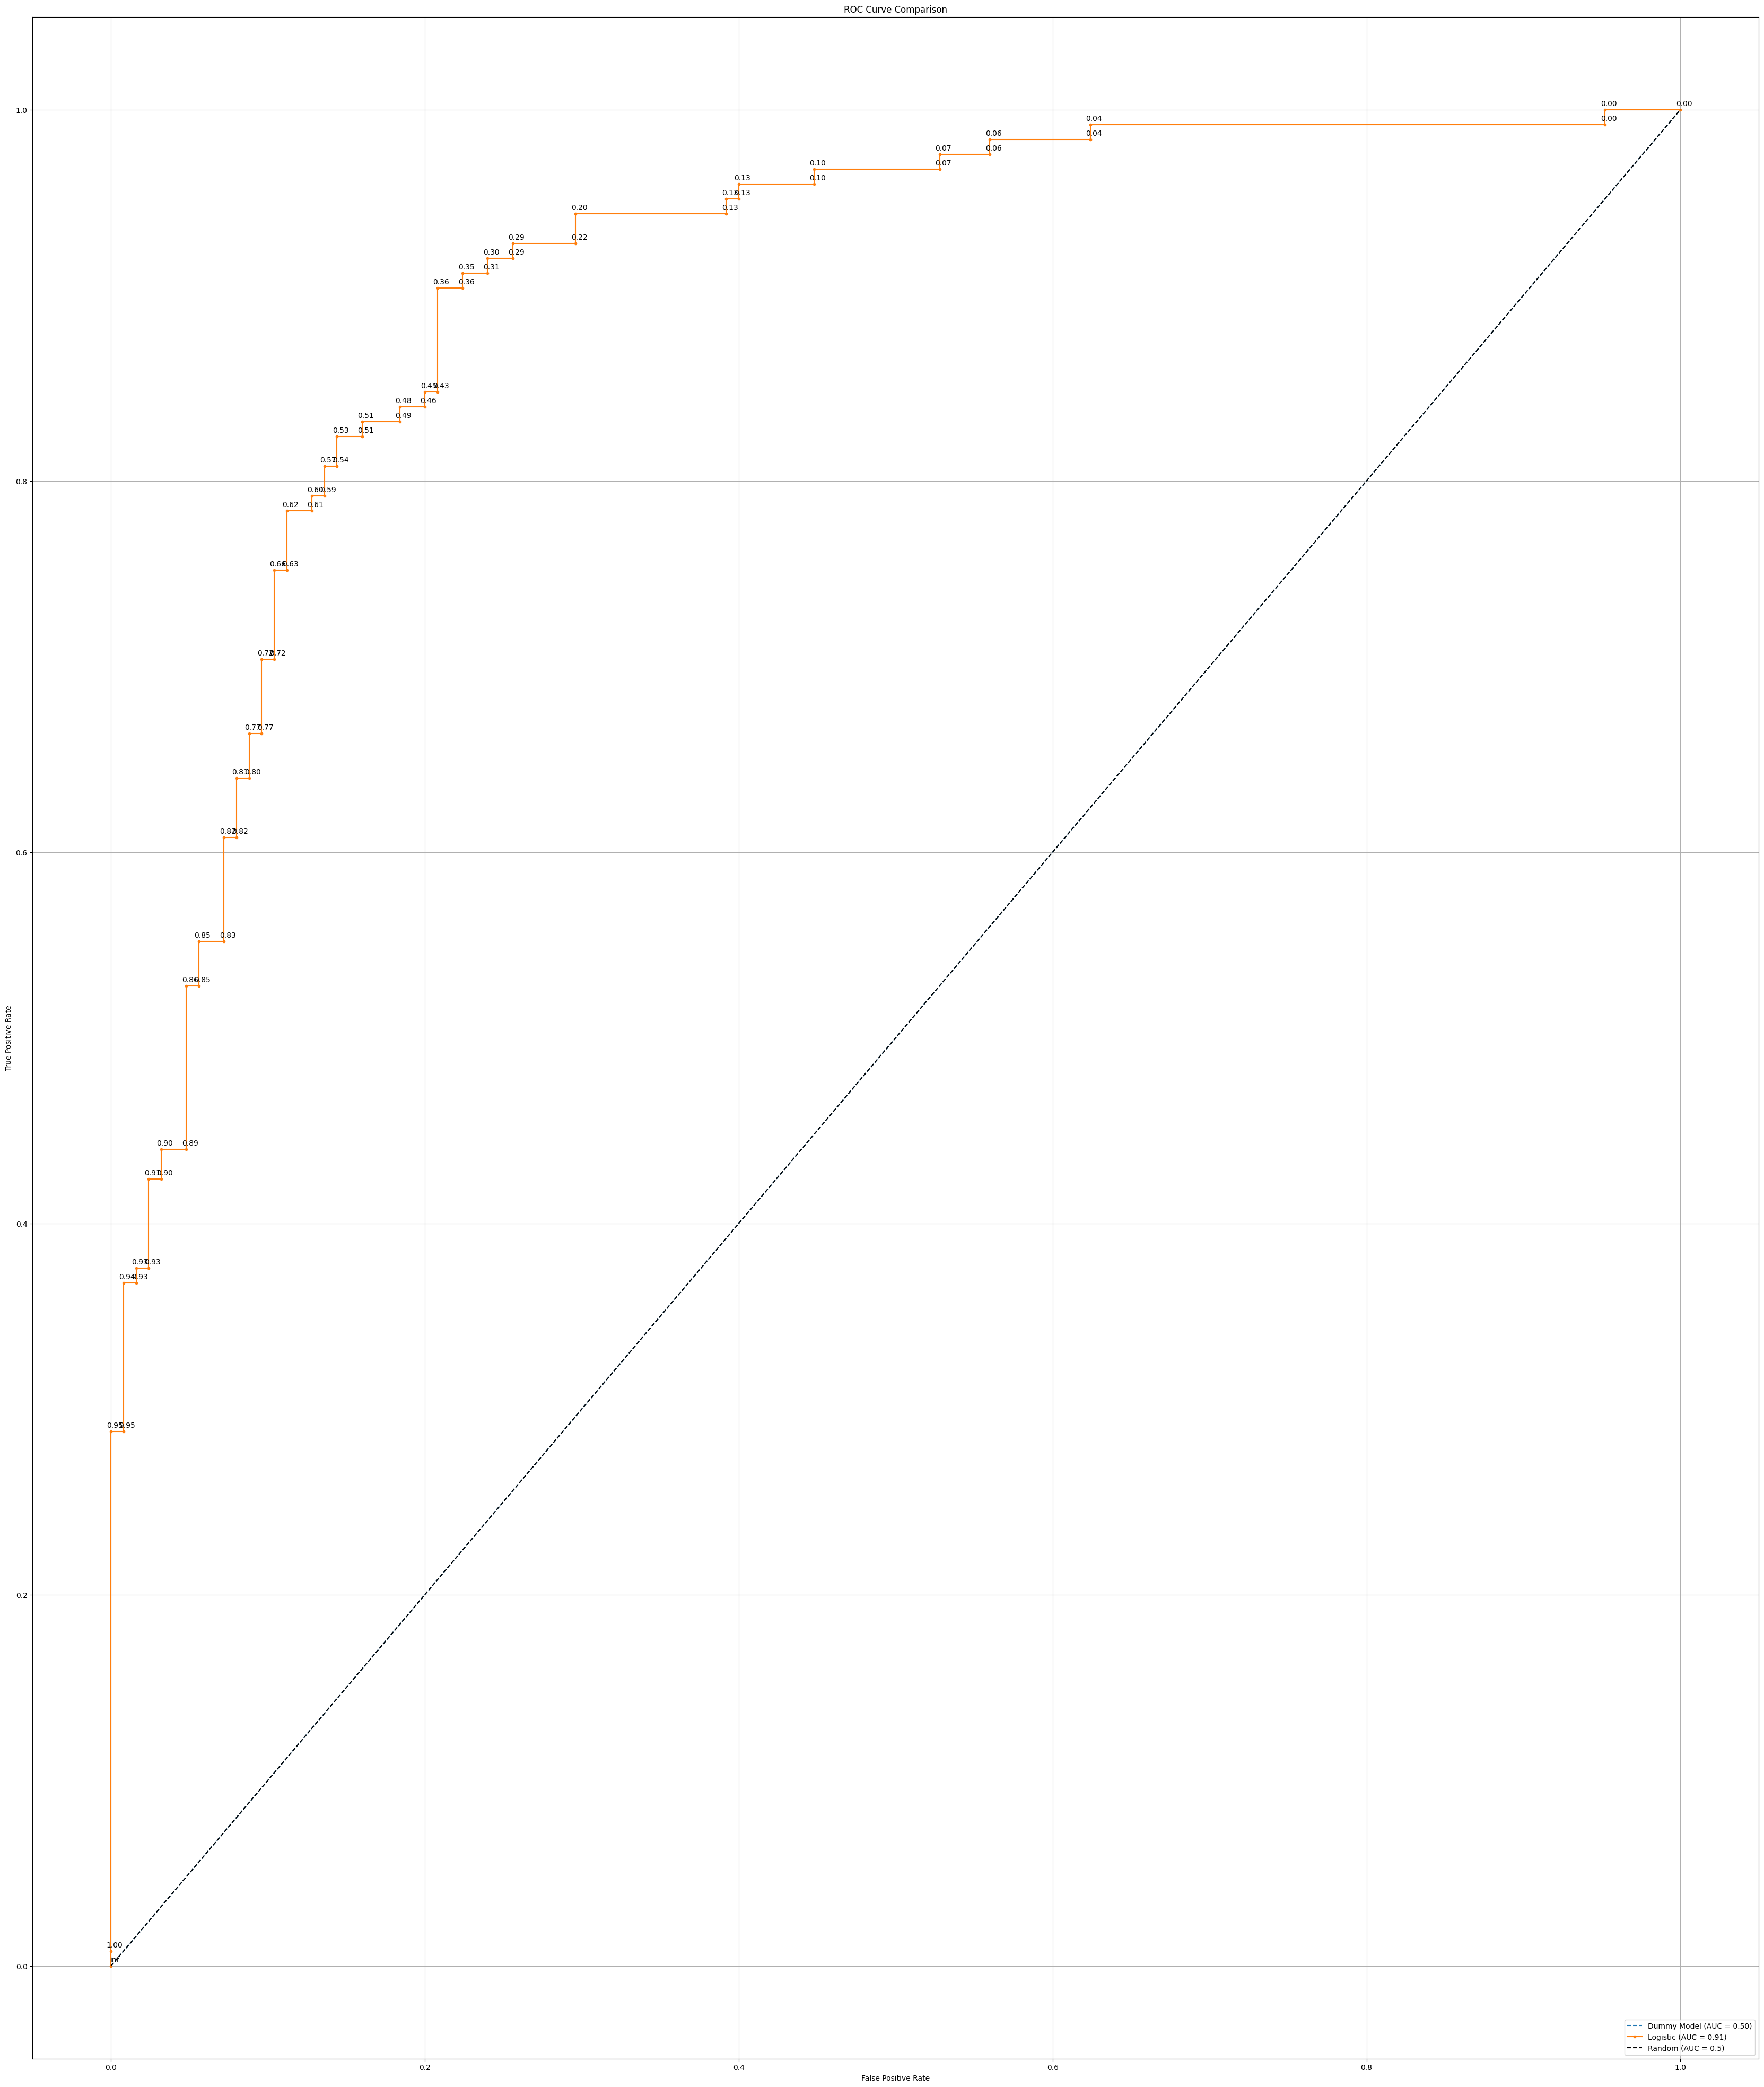

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure
plt.figure(figsize=(42, 50))

# Plot ROC curves
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model (AUC = %0.2f)' % dummy_model_auc)
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic (AUC = %0.2f)' % model_auc)

# Add threshold annotations (every 10th point to avoid clutter)
for i, (fpr, tpr, thr) in enumerate(zip(model_fpr, model_tpr, thresholds)):
    # if i % 10 == 0:  # Annotate every 10th threshold
    plt.annotate(f'{thr:.2f}', (fpr, tpr), textcoords="offset points", xytext=(5,5), ha='center')

# Add diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

# Axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')

# Legend and show
plt.legend(loc='lower right')
plt.grid(True)
plt.show()